In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import normaltest

In [2]:
#Cargar los df
df_final_experiment_clients = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_experiment_clients.txt', sep = ",")
df_final_demo = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_demo.txt", sep = ",")
df_final_web_data_pt_1 = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_1.txt', sep = ",")
df_final_web_data_pt_2 = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_2.txt', sep = ",")

In [3]:
#Creación del df final
df_web_data_merged = pd.concat([df_final_web_data_pt_1, df_final_web_data_pt_2], ignore_index=True)
df_clientes_condicion = df_final_experiment_clients.merge(df_final_demo, how = 'left', on = 'client_id')
df_final = df_clientes_condicion.merge(df_web_data_merged, how = 'left', on = 'client_id')
gender = {"F": 0, "M": 1, "U": 2, "X": 2}
df_final["gender"] = df_final["gendr"].map(gender)
df_poblacion_total = df_final.copy
df_final.dropna(subset = 'Variation', inplace = True)
# Convertir 'date_time' a tipo datetime
df_final['date_time'] = pd.to_datetime(df_final['date_time'])

# Clients Database. Exploratory analysis

In [4]:
clients_info=pd.merge(df_final_demo,df_final_experiment_clients,on="client_id")

In [5]:
df_final['bal_log'] = np.log1p(df_final['bal'])  # log1p ensures log(0) is handled

In [6]:
df_final.head()

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time,gender,bal_log
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,2.0,12.149634
1,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,2.0,12.149634
2,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,2.0,12.149634
3,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,2.0,12.149634
4,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,2.0,12.149634


#### Exploratory graphs and correlations


In [7]:
df_numerical=clients_info.select_dtypes("number")

<Axes: >

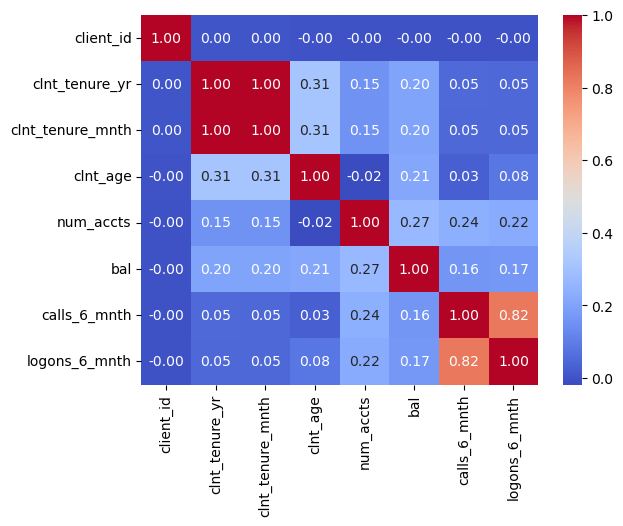

In [8]:
sns.heatmap(clients_info.corr(),annot=True, fmt='.2f', cmap='coolwarm',)

array([[<Axes: title={'center': 'client_id'}>,
        <Axes: title={'center': 'clnt_tenure_yr'}>,
        <Axes: title={'center': 'clnt_tenure_mnth'}>],
       [<Axes: title={'center': 'clnt_age'}>,
        <Axes: title={'center': 'num_accts'}>,
        <Axes: title={'center': 'bal'}>],
       [<Axes: title={'center': 'calls_6_mnth'}>,
        <Axes: title={'center': 'logons_6_mnth'}>, <Axes: >]],
      dtype=object)

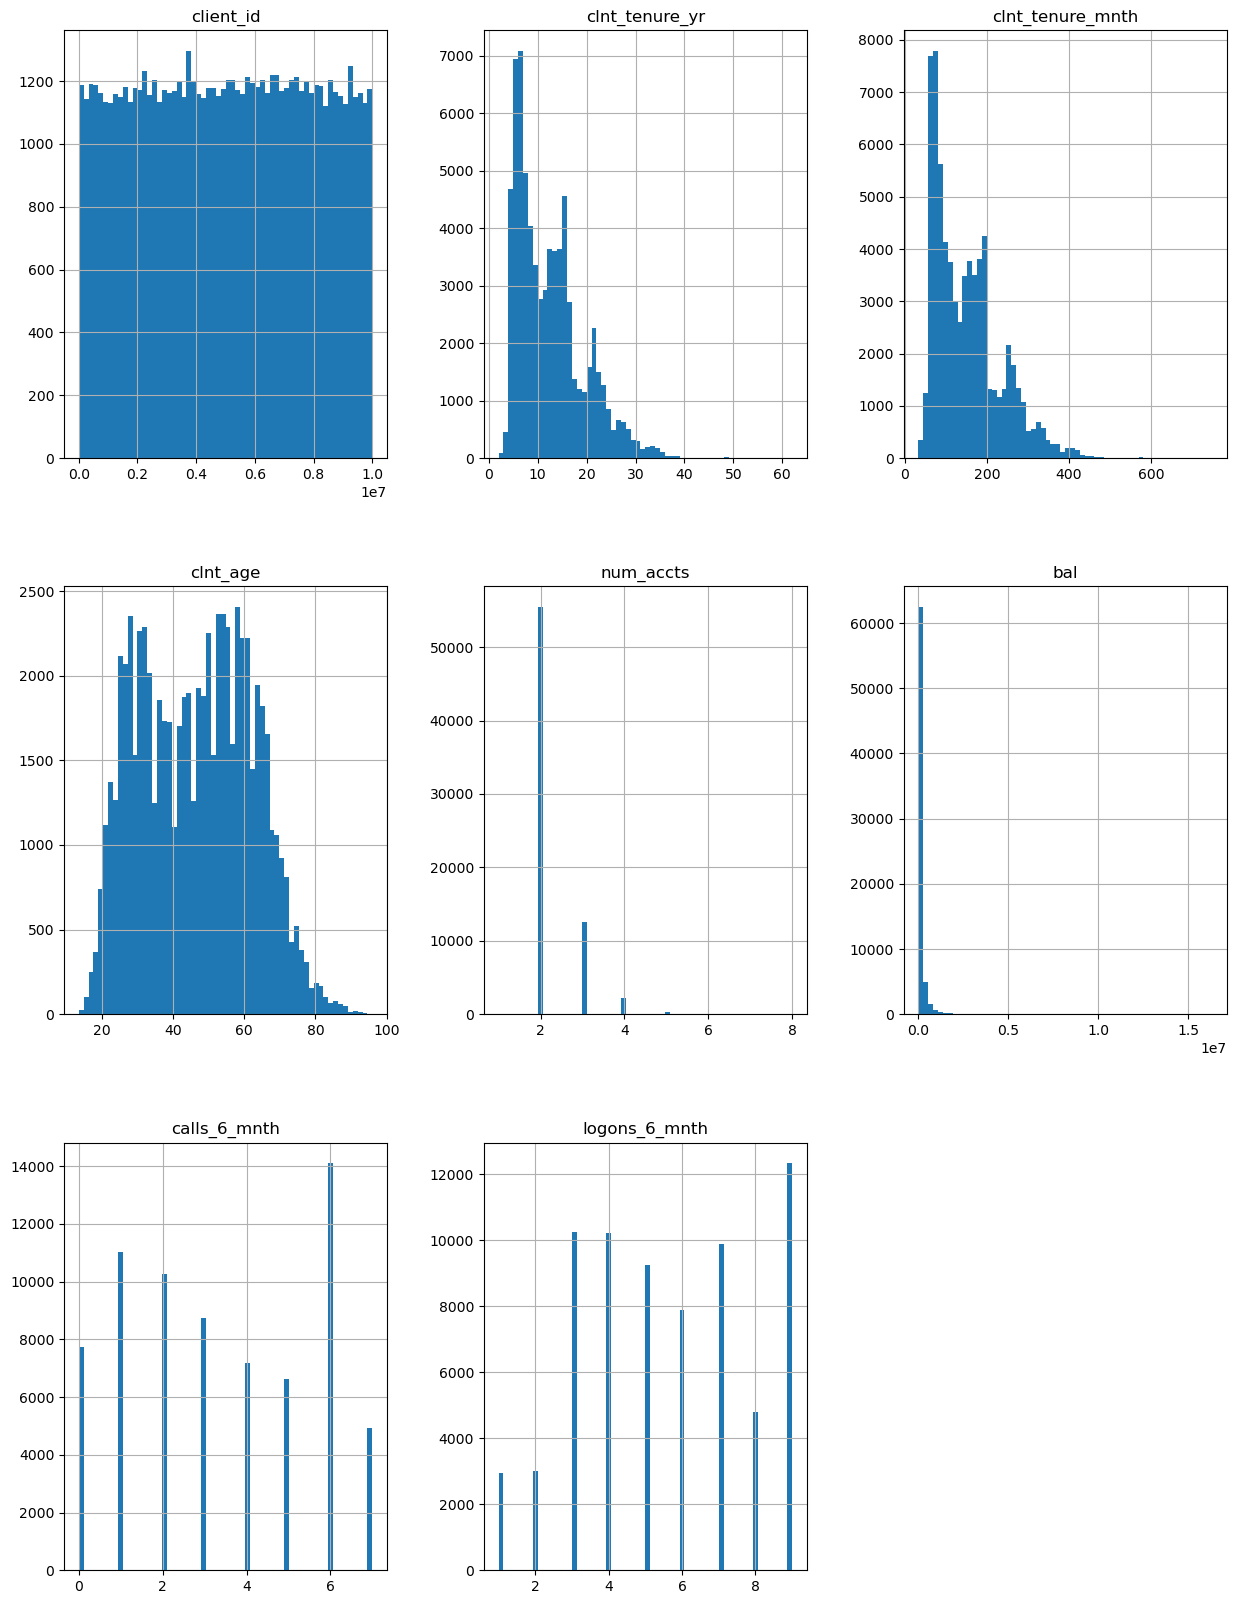

In [9]:
df_numerical.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10)

In [10]:
for column in df_final.select_dtypes(include=['number']).columns:
    statistic, pvalue = normaltest(df_final[column].dropna(), nan_policy="omit")
    if pvalue < 0.05:
        print(f"The {column} has a non normal distribution")
    else:
        print(f"The {column} has a normal distribution")

The client_id has a non normal distribution
The clnt_tenure_yr has a non normal distribution
The clnt_tenure_mnth has a non normal distribution
The clnt_age has a non normal distribution
The num_accts has a non normal distribution
The bal has a non normal distribution
The calls_6_mnth has a non normal distribution
The logons_6_mnth has a non normal distribution
The gender has a non normal distribution
The bal_log has a non normal distribution


#### Age analysis

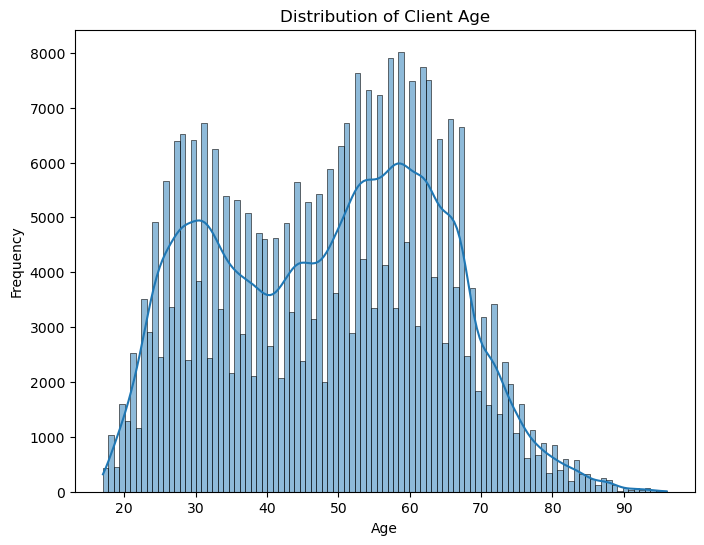

The age mode is: 0    58.5
Name: clnt_age, dtype: float64


count    321195.000000
mean         48.553511
std          15.645588
min          17.000000
25%          34.500000
50%          50.000000
75%          61.000000
max          96.000000
Name: clnt_age, dtype: float64

In [11]:
# Exploring client's age
# Plot the distribution of client ages
plt.figure(figsize=(8, 6))
sns.histplot(df_final['clnt_age'], kde=True)
plt.title('Distribution of Client Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

mode_tenure = df_final['clnt_age'].mode()
print(f'The age mode is: {mode_tenure}')
df_final['clnt_age'].describe()

C:\Users\javie\AppData\Local\Temp\ipykernel_16628\2960721573.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age_category', data=df_final, palette='Set2')


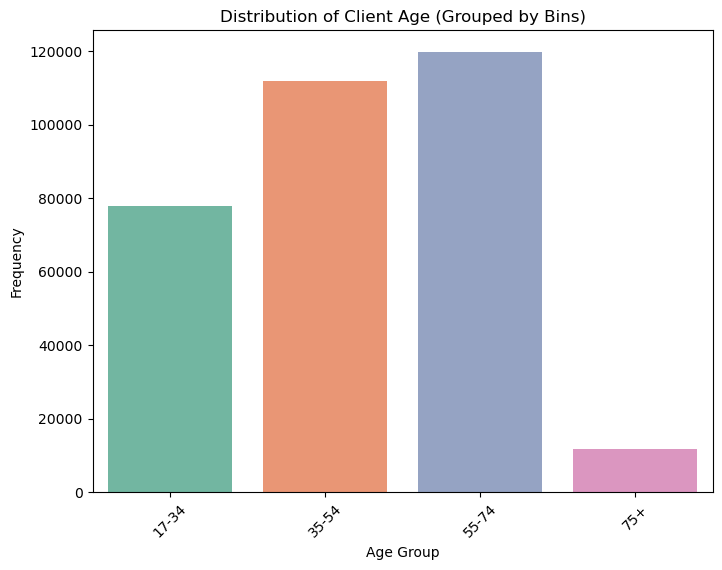

In [12]:
# Define the bins and labels for age groups
bins = [0, 34, 54, 74, 100]  # Age ranges
labels = ['17-34', '35-54', '55-74', '75+']  # Age group labels

# Create a new column for age categories
df_final['age_category'] = pd.cut(df_final['clnt_age'], bins=bins, labels=labels)

# Plot the distribution with age categories
plt.figure(figsize=(8, 6))
sns.countplot(x='age_category', data=df_final, palette='Set2')
plt.title('Distribution of Client Age (Grouped by Bins)')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate the labels for better readability
plt.show()

In [13]:
# Create a table showing percentages for each age category
age_table = df_final['age_category'].value_counts(normalize=True).sort_index().reset_index()
age_table.columns = ['Age Group', 'Percentage']

# Convert to percentage format
age_table['Percentage'] = (age_table['Percentage'] * 100).round(2)

# Print the table
print("\nAge Distribution Table (in percentages):")
print(age_table)


Age Distribution Table (in percentages):
  Age Group  Percentage
0     17-34       24.26
1     35-54       34.86
2     55-74       37.26
3       75+        3.62


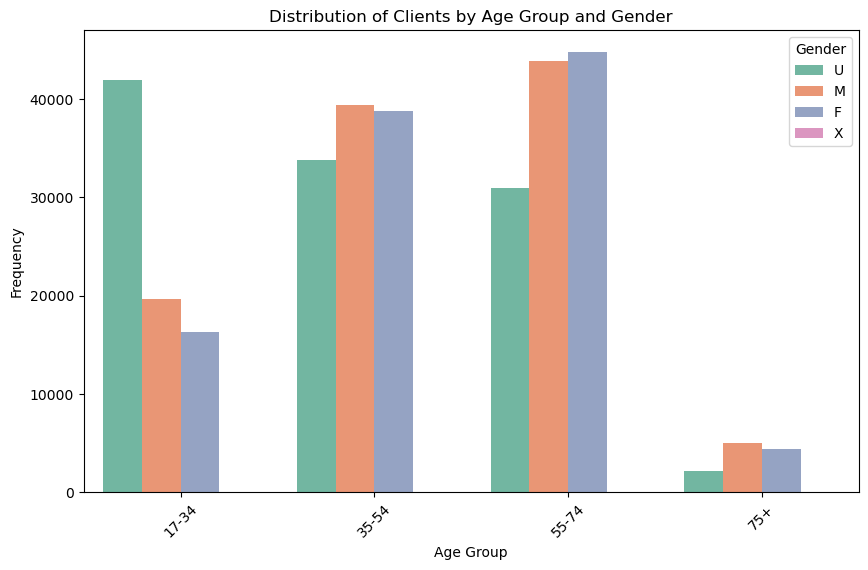

In [14]:
# Create a countplot to visualize the relationship between age groups and gender
plt.figure(figsize=(10, 6))
sns.countplot(x='age_category', hue='gendr', data=df_final, palette='Set2')

# Customize the plot
plt.title('Distribution of Clients by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(title='Gender', loc='upper right')

# Show the plot
plt.show()

In [15]:
# Aggregate the data for the table
table_data = (
    df_final.groupby(['age_category', 'gendr'])
    .size()
    .reset_index(name='count')
    .pivot(index='age_category', columns='gendr', values='count')
    .fillna(0)
    .astype(int)
)

# Display the aggregated table
print("Table of Counts by Age Group and Gender:")
print(table_data)

Table of Counts by Age Group and Gender:
gendr             F      M      U  X
age_category                        
17-34         16307  19700  41904  3
35-54         38816  39364  33791  5
55-74         44759  43903  31001  0
75+            4408   5046   2188  0


### Accounts number analysis

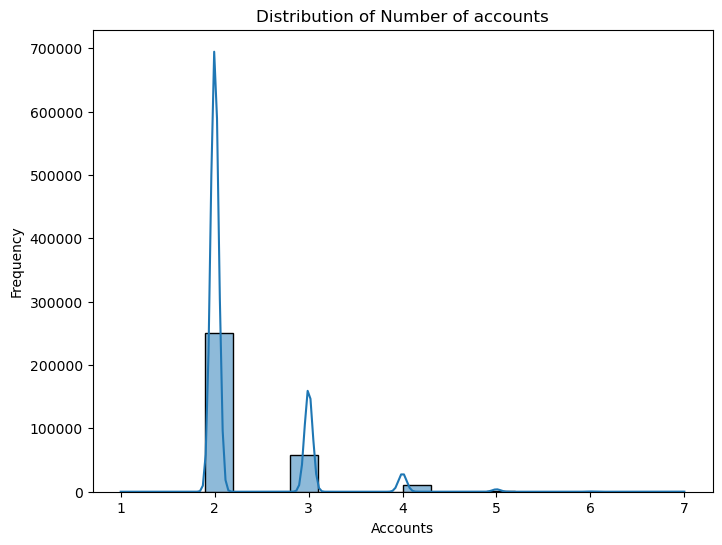

count    321207.000000
mean          2.262952
std           0.541528
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           7.000000
Name: num_accts, dtype: float64

In [16]:
# Exploring number of accounts
# Plot the distribution of accounts
plt.figure(figsize=(8, 6))
sns.histplot(df_final['num_accts'], kde=True)
plt.title('Distribution of Number of accounts')
plt.xlabel('Accounts')
plt.ylabel('Frequency')
plt.show()

mode_tenure = df_final['num_accts'].mode()
df_final['num_accts'].describe()

### Tenure analysis

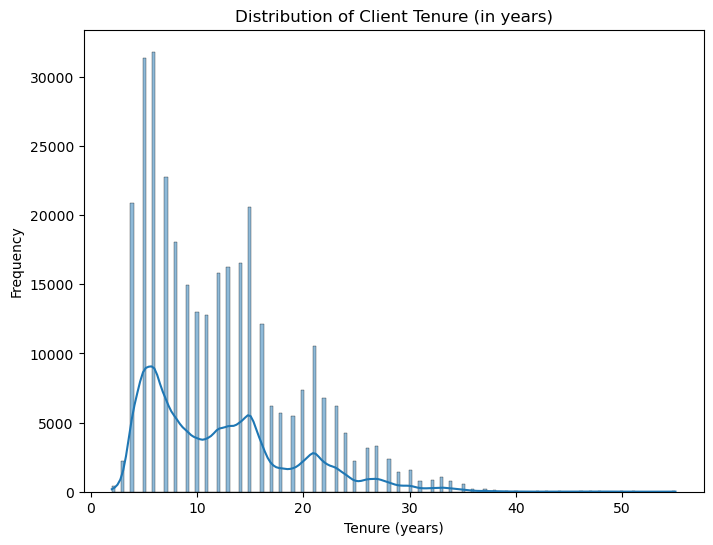

Mean tenure: 12.176372245934864 years
Median tenure: 11.0 years
Mode tenure: 6.0 years


count    321207.000000
mean         12.176372
std           6.963097
min           2.000000
25%           6.000000
50%          11.000000
75%          16.000000
max          55.000000
Name: clnt_tenure_yr, dtype: float64

In [17]:
# Exploring client tenure
# Plot the distribution of client tenure (in years)
plt.figure(figsize=(8, 6))
sns.histplot(df_final['clnt_tenure_yr'], kde=True)
plt.title('Distribution of Client Tenure (in years)')
plt.xlabel('Tenure (years)')
plt.ylabel('Frequency')
plt.show()

# Calculate the mean and median tenure
mean_tenure = df_final['clnt_tenure_yr'].mean()
median_tenure = df_final['clnt_tenure_yr'].median()
mode_tenure = df_final['clnt_tenure_yr'].mode().iloc[0]  # Get the first mode value

print(f"Mean tenure: {mean_tenure} years")
print(f"Median tenure: {median_tenure} years")
print(f"Mode tenure: {mode_tenure} years")

df_final['clnt_tenure_yr'].describe()

C:\Users\javie\AppData\Local\Temp\ipykernel_16628\852211275.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='tenure_category', data=df_final, palette='Set2')


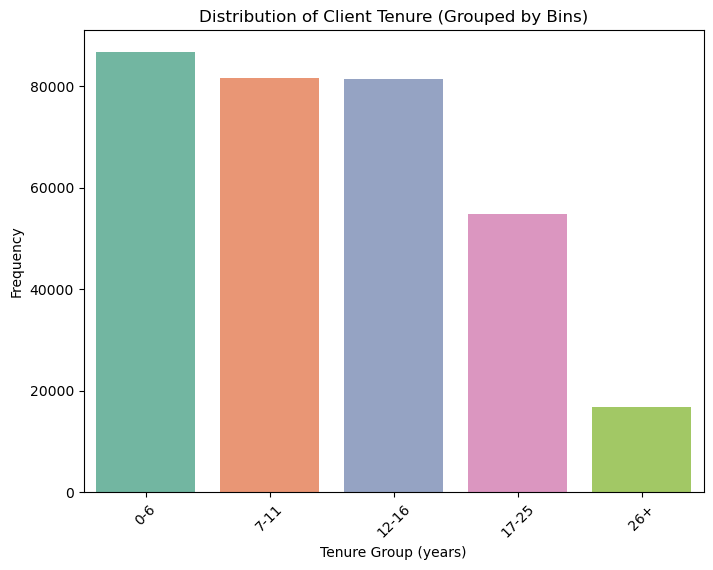

In [18]:
# Define the bins and labels for tenure groups
bins = [0, 6, 11, 16, 25, 55]  # Based on the summary data
labels = ['0-6', '7-11', '12-16', '17-25', '26+']  # Tenure group labels

# Create a new column for tenure categories
df_final['tenure_category'] = pd.cut(df_final['clnt_tenure_yr'], bins=bins, labels=labels)

# Plot the distribution with tenure categories
plt.figure(figsize=(8, 6))
sns.countplot(x='tenure_category', data=df_final, palette='Set2')
plt.title('Distribution of Client Tenure (Grouped by Bins)')
plt.xlabel('Tenure Group (years)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [19]:
# Create a table showing counts for each tenure category
tenure_table = df_final['tenure_category'].value_counts().sort_index().reset_index()
tenure_table.columns = ['Tenure Group', 'Count']

# Print the table
print("\nTenure Distribution Table:")
print(tenure_table)


Tenure Distribution Table:
  Tenure Group  Count
0          0-6  86707
1         7-11  81584
2        12-16  81363
3        17-25  54764
4          26+  16789


In [20]:
df_final['clnt_tenure_yr'].describe()

count    321207.000000
mean         12.176372
std           6.963097
min           2.000000
25%           6.000000
50%          11.000000
75%          16.000000
max          55.000000
Name: clnt_tenure_yr, dtype: float64


Tenure Distribution by Age Group (in percentages):
tenure_category    0-6   7-11  12-16  17-25    26+
age_category                                      
17-34            44.49  30.23  16.40   7.07   1.80
35-54            22.75  25.31  31.50  17.97   2.47
55-74            20.99  23.19  25.66  21.55   8.60
75+              12.39  16.53  22.32  28.69  20.07


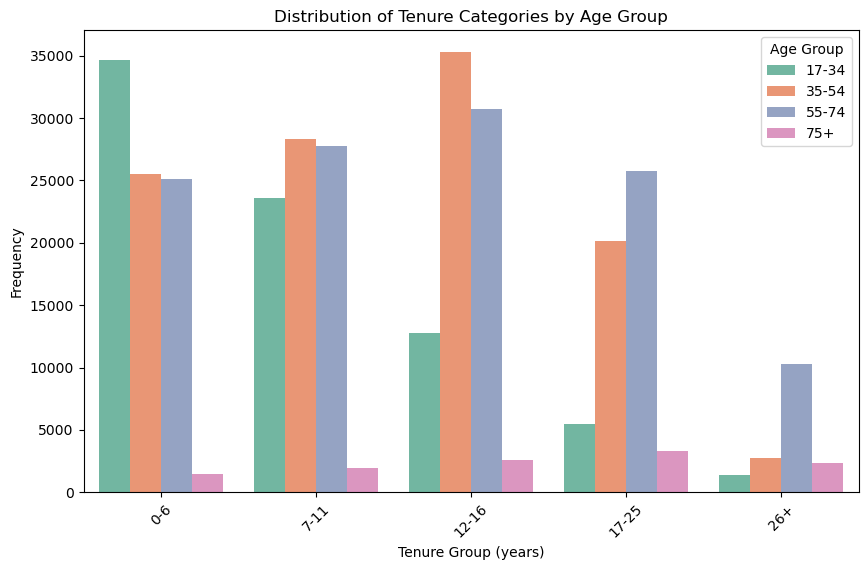

In [21]:
# Create a crosstab to study tenure categories by age group
tenure_age_table = pd.crosstab(df_final['age_category'], df_final['tenure_category'], normalize='index') * 100

# Display the table
print("\nTenure Distribution by Age Group (in percentages):")
print(tenure_age_table.round(2))

# Plot the distribution with tenure categories and age groups
plt.figure(figsize=(10, 6))
sns.countplot(x='tenure_category', hue='age_category', data=df_final, palette='Set2')

# Customize the plot
plt.title('Distribution of Tenure Categories by Age Group')
plt.xlabel('Tenure Group (years)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Age Group', loc='upper right')

### Balance analysis

C:\Users\javie\AppData\Local\Temp\ipykernel_16628\1821021074.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, y='bal', palette='Set2')


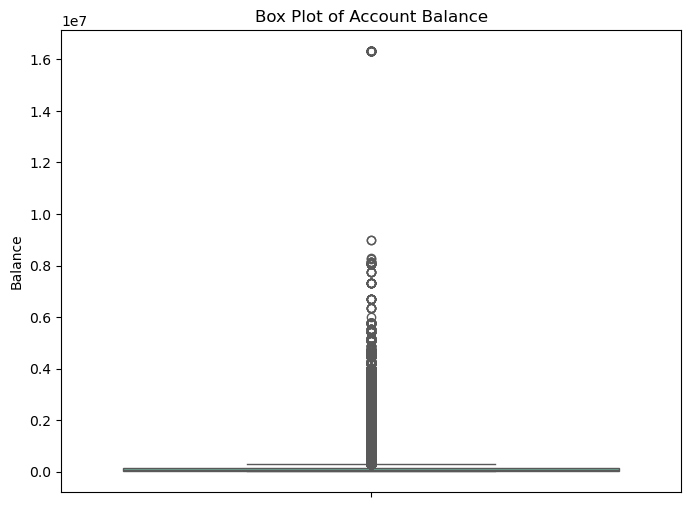

count    3.212070e+05
mean     1.622097e+05
std      3.494719e+05
min      2.378944e+04
25%      4.105887e+04
50%      6.924049e+04
75%      1.514930e+05
max      1.632004e+07
Name: bal, dtype: float64

In [22]:
# Boxplot and summary for balance
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_final, y='bal', palette='Set2')
plt.title('Box Plot of Account Balance')
plt.ylabel('Balance')
plt.show()

# Statistical summary for balance
df_final['bal'].describe()

In [23]:
bins=[-float('inf'), 39586.055, 64548.38, 133473.475, float('inf')]
labels=['Low', 'Medium', 'High', 'Very High']

df_final['balance_category'] = pd.cut(df_final['bal'], bins=bins, labels=labels)

df_final[['bal', 'balance_category']].head()

,bal,balance_category
0,189023.86,Very High
1,189023.86,Very High
2,189023.86,Very High
3,189023.86,Very High
4,189023.86,Very High


In [24]:
# Checking balance outliers (over 1M)
count_over_limit = df_final[df_final['bal'] > 1000000]['client_id'].nunique()
print(count_over_limit)

828


In [25]:
df_filtered_balance = df_final[df_final['bal'] <= 1000000]
df_filtered_balance['bal'].describe()

count    315010.000000
mean     128051.941467
std      152013.777493
min       23789.440000
25%       40650.280000
50%       67600.010000
75%      143209.030000
max      999154.490000
Name: bal, dtype: float64

C:\Users\javie\AppData\Local\Temp\ipykernel_16628\921716255.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=balance_counts.index, y=balance_counts.values, palette='Set2')


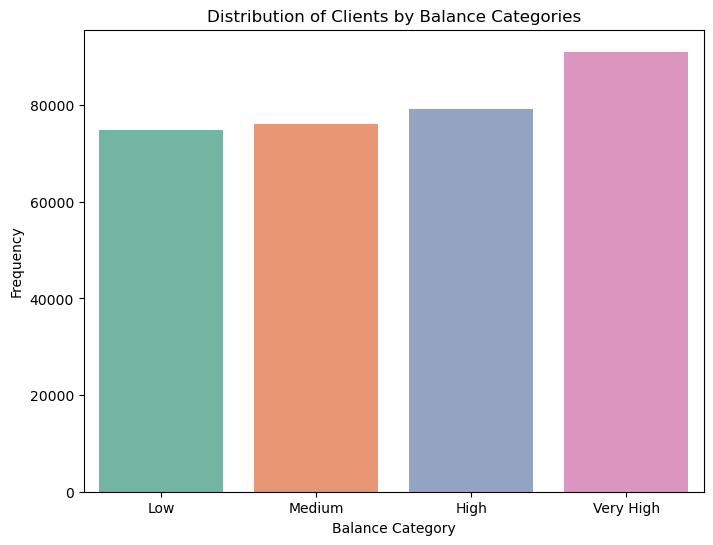

In [26]:
# Create a bar graph for the balance categories
plt.figure(figsize=(8, 6))
balance_counts = df_final['balance_category'].value_counts().sort_index()
sns.barplot(x=balance_counts.index, y=balance_counts.values, palette='Set2')

# Customize the graph
plt.title('Distribution of Clients by Balance Categories')
plt.xlabel('Balance Category')
plt.ylabel('Frequency')
plt.show()

In [27]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis for the balance variable
balance_skewness = skew(df_final['bal'])
balance_kurtosis = kurtosis(df_final['bal'])

# Print the results
print(f"Skewness of balance: {balance_skewness}")
print(f"Kurtosis of balance: {balance_kurtosis}")

Skewness of balance: nan
Kurtosis of balance: nan


The balance distribution has a long right tail with many outliers, suggesting that most clients have moderate balances, while a few clients hold very high balances that heavily influence the distribution.

### Other cross anaylisis

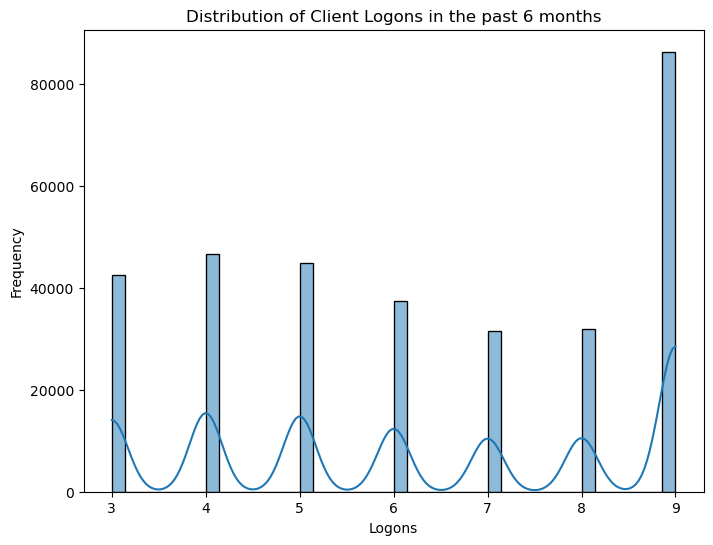

The logons mode is: 0    9.0
Name: logons_6_mnth, dtype: float64


count    321207.000000
mean          6.275109
std           2.179721
min           3.000000
25%           4.000000
50%           6.000000
75%           9.000000
max           9.000000
Name: logons_6_mnth, dtype: float64

In [28]:
# Exploring logons
# Plot the distribution of logons
plt.figure(figsize=(8, 6))
sns.histplot(df_final['logons_6_mnth'], kde=True)
plt.title('Distribution of Client Logons in the past 6 months')
plt.xlabel('Logons')
plt.ylabel('Frequency')
plt.show()

mode_tenure = df_final['logons_6_mnth'].mode()
print(f'The logons mode is: {mode_tenure}')
df_final['logons_6_mnth'].describe()

C:\Users\javie\AppData\Local\Temp\ipykernel_16628\837293117.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_balance, x='age_category', y='bal', palette='Set2')


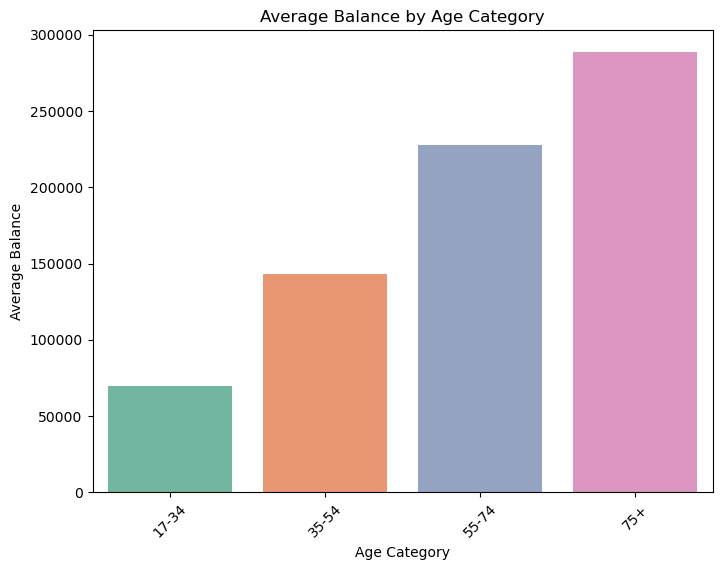

C:\Users\javie\AppData\Local\Temp\ipykernel_16628\837293117.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tenure_balance, x='tenure_category', y='bal', palette='Set2')


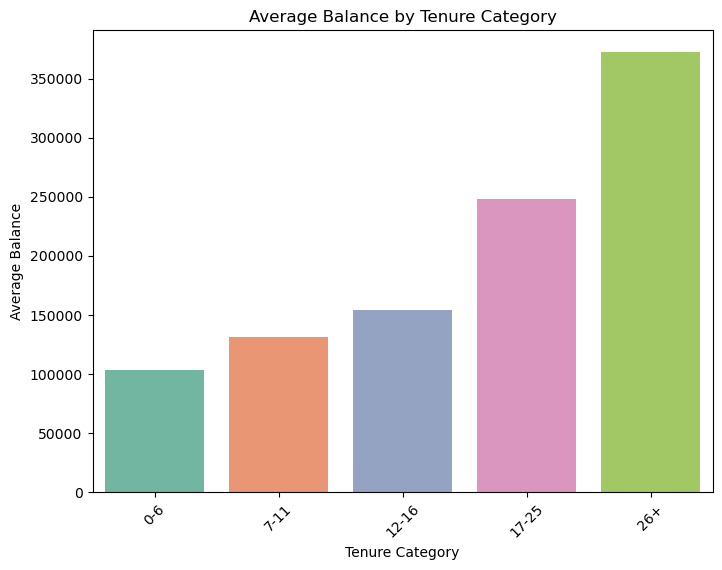

C:\Users\javie\AppData\Local\Temp\ipykernel_16628\837293117.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=balance_logons, x='balance_category', y='logons_6_mnth', palette='Set2')


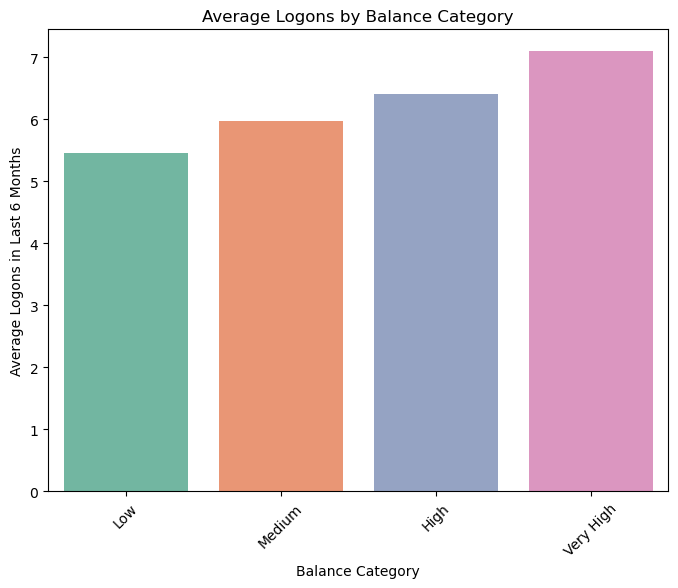

C:\Users\javie\AppData\Local\Temp\ipykernel_16628\837293117.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=balance_logons, x='age_category', y='logons_6_mnth', palette='Set2')


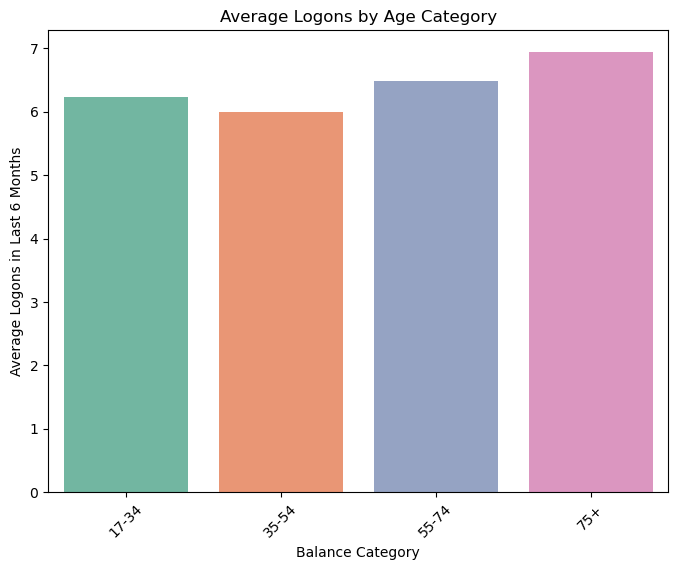

In [29]:
# Age and Balance
age_balance = df_final.groupby('age_category')['bal'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=age_balance, x='age_category', y='bal', palette='Set2')
plt.title('Average Balance by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Average Balance')
plt.xticks(rotation=45)
plt.show()

# Tenure Years and Balance
tenure_balance = df_final.groupby('tenure_category')['bal'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=tenure_balance, x='tenure_category', y='bal', palette='Set2')
plt.title('Average Balance by Tenure Category')
plt.xlabel('Tenure Category')
plt.ylabel('Average Balance')
plt.xticks(rotation=45)
plt.show()

# Balance and Logons in the Last Six Months
balance_logons = df_final.groupby('balance_category')['logons_6_mnth'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=balance_logons, x='balance_category', y='logons_6_mnth', palette='Set2')
plt.title('Average Logons by Balance Category')
plt.xlabel('Balance Category')
plt.ylabel('Average Logons in Last 6 Months')
plt.xticks(rotation=45)
plt.show()

# Logons by age the Last Six Months
balance_logons = df_final.groupby('age_category')['logons_6_mnth'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=balance_logons, x='age_category', y='logons_6_mnth', palette='Set2')
plt.title('Average Logons by Age Category')
plt.xlabel('Balance Category')
plt.ylabel('Average Logons in Last 6 Months')
plt.xticks(rotation=45)
plt.show()

# Test and control groups analysis

#### Checking whether control and test data points are equally distributed

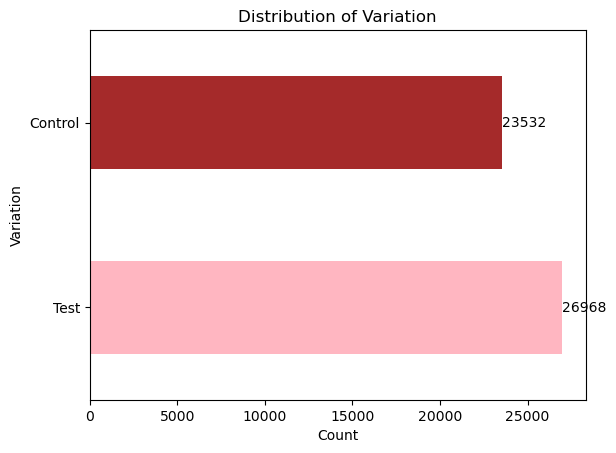

In [30]:
ax=clients_info["Variation"].value_counts().plot.barh(color=['lightpink', 'brown'])
for i in ax.patches:
    ax.text(i.get_width() + 0.2, i.get_y() + i.get_height() / 2,  # Position of the text
            str(i.get_width()),
            va='center', ha='left', fontsize=10, color='black')

ax.set_xlabel('Count')
ax.set_ylabel('Variation')
ax.set_title('Distribution of Variation')

plt.show()

Checking whether test and control data points have similar characteristics

C:\Users\javie\AppData\Local\Temp\ipykernel_16628\1067251393.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clients_info, x='Variation', y='bal_log', palette="coolwarm")


<Axes: xlabel='Variation', ylabel='bal_log'>

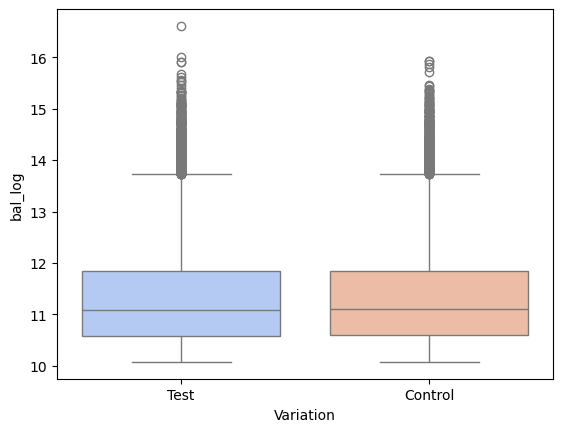

In [31]:
clients_info["bal_log"]=np.log(clients_info["bal"])
sns.boxplot(data=clients_info, x='Variation', y='bal_log', palette="coolwarm")

C:\Users\javie\AppData\Local\Temp\ipykernel_16628\4260963547.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=clients_info, x='Variation', y='clnt_tenure_yr', palette="coolwarm")


<Axes: xlabel='Variation', ylabel='clnt_tenure_yr'>

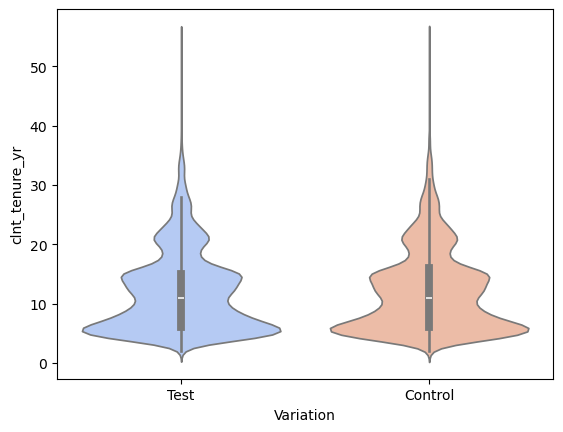

In [32]:
sns.violinplot(data=clients_info, x='Variation', y='clnt_tenure_yr', palette="coolwarm")

Number of clients who finished the process by Variation group:
Test       25722
Control    17505
Name: Variation, dtype: int64

Percentage of clients who finished the process by Variation group:
Test       59.504476
Control    40.495524
Name: Variation, dtype: float64


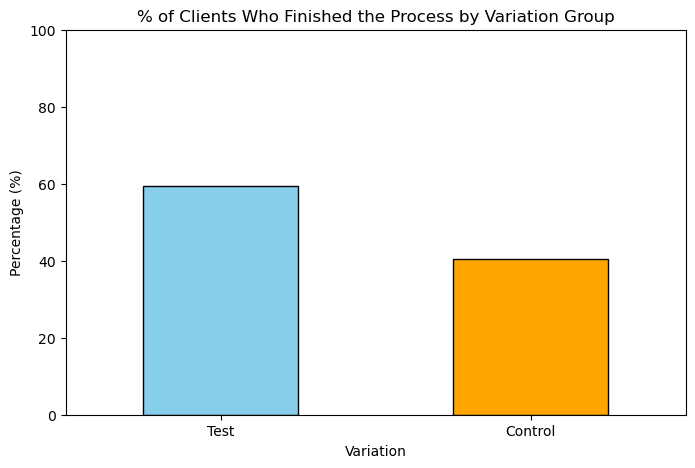

C:\Users\javie\AppData\Local\Temp\ipykernel_16628\1712586995.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finished_process['age_group'] = pd.cut(df_finished_process['clnt_age'], bins=age_bins, labels=age_labels)


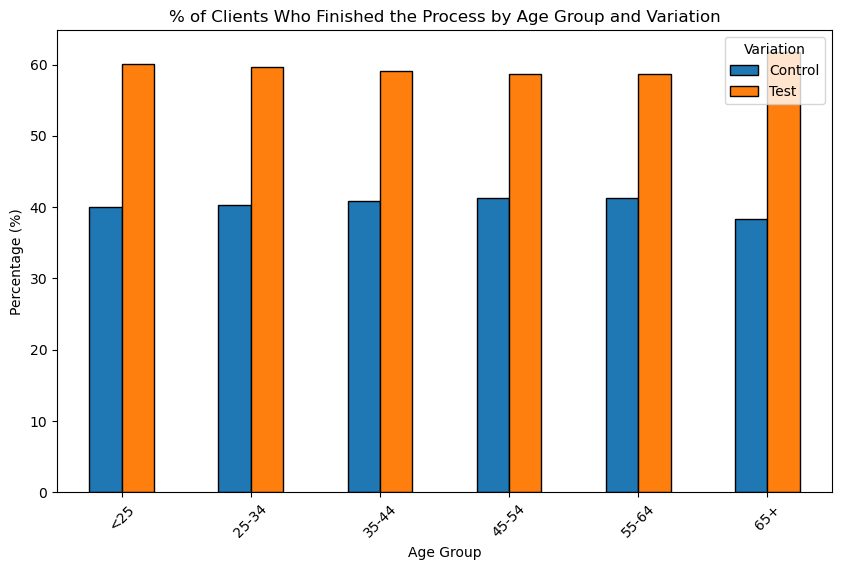


Hypothesis Testing Results (Chi-Square Test):
Chi-Square Statistic: 18.63067064583126
p-value: 0.0022515173008758466
Degrees of Freedom: 5
There is a statistically significant relationship between age group and Variation for process completion.


In [33]:
# Step 1: Filter the clients who have finished the process (process_step == 'confirm')
df_finished_process = df_final[df_final['process_step'] == 'confirm']

# Step 2: Count how many clients belong to the "test" or "control" group
variation_counts = df_finished_process['Variation'].value_counts()

# Step 3: Calculate the percentage of clients in each group
variation_percentage = df_finished_process['Variation'].value_counts(normalize=True) * 100

# Show the results
print(f"Number of clients who finished the process by Variation group:")
print(variation_counts)

print(f"\nPercentage of clients who finished the process by Variation group:")
print(variation_percentage)

# Visualization of % completion by Variation group
plt.figure(figsize=(8, 5))
variation_percentage.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')
plt.title('% of Clients Who Finished the Process by Variation Group')
plt.xlabel('Variation')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.show()

# Step 4: Calculate the percentage of clients by age group for Test and Control groups
age_bins = [0, 25, 35, 45, 55, 65, 100]
age_labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
df_finished_process['age_group'] = pd.cut(df_finished_process['clnt_age'], bins=age_bins, labels=age_labels)

age_variation_percentage = (
    df_finished_process.groupby(['age_group', 'Variation']).size()
    .unstack('Variation', fill_value=0)
    .apply(lambda x: x / x.sum() * 100, axis=1)
)

# Visualization of % completion by age group
age_variation_percentage.plot(kind='bar', figsize=(10, 6), edgecolor='black')
plt.title('% of Clients Who Finished the Process by Age Group and Variation')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Variation')
plt.show()

# Step 5: Hypothesis Testing
# Create a contingency table
contingency_table = pd.crosstab(df_finished_process['Variation'], df_finished_process['age_group'])

# Perform Chi-Square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nHypothesis Testing Results (Chi-Square Test):")
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p_value}")
print(f"Degrees of Freedom: {dof}")

# Conclusion
if p_value < 0.05:
    print("There is a statistically significant relationship between age group and Variation for process completion.")
else:
    print("There is no statistically significant relationship between age group and Variation for process completion.")


Demographic profile of clients who finished the process by Variation group:
            clnt_age        clnt_tenure_yr        num_accts            bal
                mean median           mean median      mean           mean
Variation                                                                 
Control    47.771517  49.00      12.313847   11.0  2.290017  159675.457672
Test       48.009119  49.25      12.428216   11.0  2.308096  180558.904385


<Figure size 800x500 with 0 Axes>

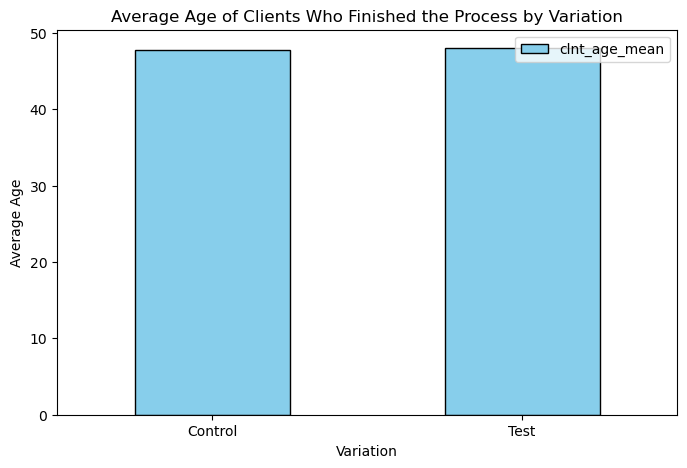

<Figure size 800x500 with 0 Axes>

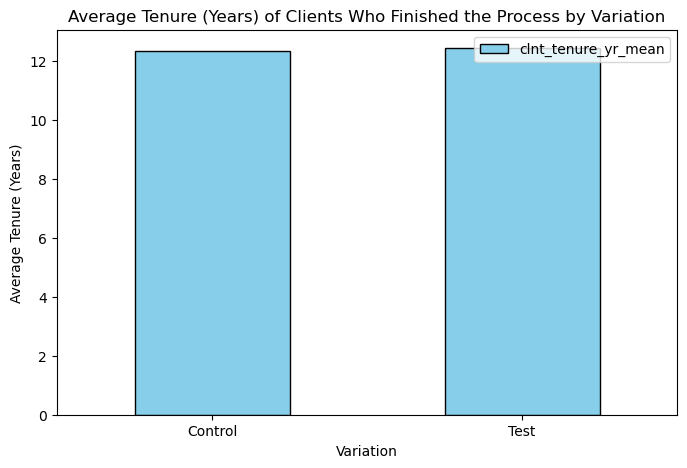

<Figure size 800x500 with 0 Axes>

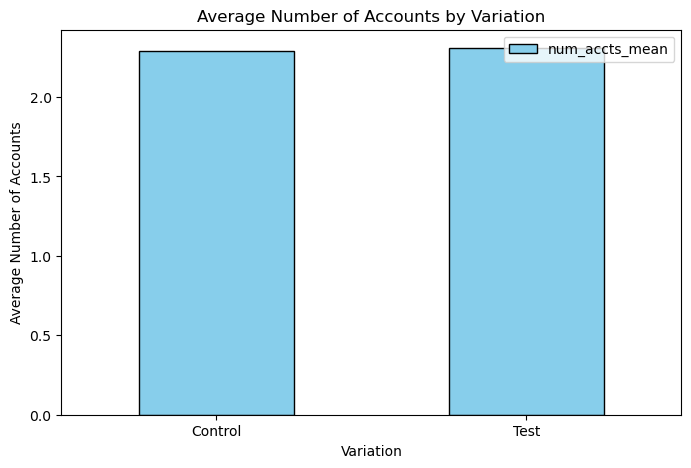

<Figure size 800x500 with 0 Axes>

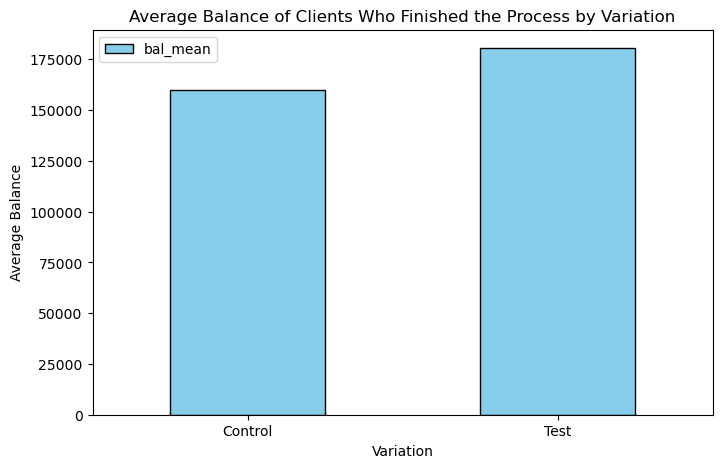


Hypothesis Testing Results for Demographics:
         Variable       Test Avg    Control Avg  t-statistic   p-value
0        clnt_age      48.009119      47.771517  226591552.5  0.208110
1  clnt_tenure_yr      12.428216      12.313847  226363312.0  0.284097
2       num_accts       2.308096       2.290017  228181833.5  0.000889
3             bal  180558.904385  159675.457672  230538165.5  0.000014
No statistically significant difference in clnt_age (p-value = 0.2081).
No statistically significant difference in clnt_tenure_yr (p-value = 0.2841).
There is a statistically significant difference in num_accts between Test and Control groups (p-value = 0.0009).
There is a statistically significant difference in bal between Test and Control groups (p-value = 0.0000).


In [34]:
# Step 6: Checking demographic profiles by Variation
demographic_profile = df_finished_process.groupby('Variation').agg({
    'clnt_age': ['mean', 'median'],
    'clnt_tenure_yr': ['mean', 'median'],
    'num_accts': ['mean'],
    'bal': ['mean']
})

print(f"\nDemographic profile of clients who finished the process by Variation group:")
print(demographic_profile)

# Step 7: Visualization of demographic differences
demographic_profile.columns = ['_'.join(col).strip() for col in demographic_profile.columns.values]

# Visualization: Average Age
plt.figure(figsize=(8, 5))
demographic_profile[['clnt_age_mean']].plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black', figsize=(8, 5))
plt.title('Average Age of Clients Who Finished the Process by Variation')
plt.xlabel('Variation')
plt.ylabel('Average Age')
plt.xticks(rotation=0)
plt.show()

# Visualization: Average Tenure
plt.figure(figsize=(8, 5))
demographic_profile[['clnt_tenure_yr_mean']].plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black', figsize=(8, 5))
plt.title('Average Tenure (Years) of Clients Who Finished the Process by Variation')
plt.xlabel('Variation')
plt.ylabel('Average Tenure (Years)')
plt.xticks(rotation=0)
plt.show()


# Visualization: Average Number of Accounts
plt.figure(figsize=(8, 5))
demographic_profile[['num_accts_mean']].plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black', figsize=(8, 5))
plt.title('Average Number of Accounts by Variation')
plt.xlabel('Variation')
plt.ylabel('Average Number of Accounts')
plt.xticks(rotation=0)
plt.show()

# Visualization: Average Balance
plt.figure(figsize=(8, 5))
demographic_profile[['bal_mean']].plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black', figsize=(8, 5))
plt.title('Average Balance of Clients Who Finished the Process by Variation')
plt.xlabel('Variation')
plt.ylabel('Average Balance')
plt.xticks(rotation=0)
plt.show()

# Step 8: Hypothesis Testing for demographic variables
hypothesis_results_demo = []

for column in ['clnt_age', 'clnt_tenure_yr', 'num_accts', 'bal']:
    test_group = df_finished_process[df_finished_process['Variation'] == 'Test'][column]
    control_group = df_finished_process[df_finished_process['Variation'] == 'Control'][column]

    # Perform t-test
    t_stat, p_value = mannwhitneyu(test_group, control_group, nan_policy='omit')

    # Store results
    hypothesis_results_demo.append({
        'Variable': column,
        'Test Avg': test_group.mean(),
        'Control Avg': control_group.mean(),
        't-statistic': t_stat,
        'p-value': p_value
    })

# Convert results to DataFrame for display
hypothesis_demo_df = pd.DataFrame(hypothesis_results_demo)

# Print hypothesis test results
print("\nHypothesis Testing Results for Demographics:")
print(hypothesis_demo_df)

# Conclusion
for index, row in hypothesis_demo_df.iterrows():
    if row['p-value'] < 0.05:
        print(f"There is a statistically significant difference in {row['Variable']} between Test and Control groups (p-value = {row['p-value']:.4f}).")
    else:
        print(f"No statistically significant difference in {row['Variable']} (p-value = {row['p-value']:.4f}).")


Total de casos por grupo Variation (Test vs Control):
Variation
Control    143462
Test       177847
dtype: int64


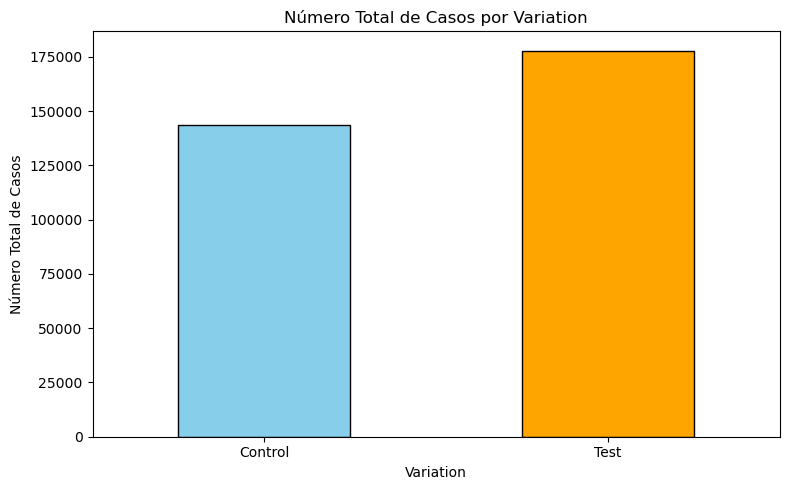


Resultados de la prueba de Chi-cuadrado para la distribución de casos entre los grupos Test y Control:
Estadístico Chi-cuadrado: 0.0000
Valor p: 1.0000
No existe una diferencia estadísticamente significativa en el número total de casos entre los grupos Test y Control (p-valor = 1.0000).


In [35]:
#Compare the number of process_step(cases) between both variation groups
# Step 9: Contando el número total de casos de process_step por Variation
process_step_total = df_final.groupby('Variation').size()

# Imprimir los resultados
print("\nTotal de casos por grupo Variation (Test vs Control):")
print(process_step_total)

# Step 10: Visualización del número total de casos por Variation
process_step_total.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black', figsize=(8, 5))
plt.title('Número Total de Casos por Variation')
plt.xlabel('Variation')
plt.ylabel('Número Total de Casos')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Crear una tabla de contingencia con los totales de los grupos
contingency_table = pd.DataFrame(process_step_total).T  # Convertir la serie a DataFrame
contingency_table.columns = process_step_total.index  # Asignar nombres de columna

# Realizar la prueba de Chi-cuadrado
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Mostrar los resultados de la prueba de Chi-cuadrado
print("\nResultados de la prueba de Chi-cuadrado para la distribución de casos entre los grupos Test y Control:")
print(f"Estadístico Chi-cuadrado: {chi2_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Conclusión basada en el valor p
if p_value < 0.05:
    print("Existe una diferencia estadísticamente significativa en el número total de casos entre los grupos Test y Control (p-valor = {:.4f}).".format(p_value))
else:
    print("No existe una diferencia estadísticamente significativa en el número total de casos entre los grupos Test y Control (p-valor = {:.4f}).".format(p_value))

# Completion rate

In [36]:
# Filter the dataframe for rows where process_step is "confirm"
finished_process = df_final[df_final['process_step'] == 'confirm']

# Count the unique client_id values that have reached the "confirm" step
finished_process_count = finished_process['client_id'].nunique()

# Display the result
print(f"Number of clients who finished the process (i.e., reached 'confirm' step): {finished_process_count}")

Number of clients who finished the process (i.e., reached 'confirm' step): 34121


In [37]:
# Total number of unique clients
total_clients = df_final['client_id'].nunique()

# Proportion of clients who finished the process
finished_process_proportion = finished_process_count / total_clients * 100

# Display the result as a proportion (e.g., 0.5 means 50%)
print(f"Proportion of clients who finished the process: {finished_process_proportion:.2f}%")

Proportion of clients who finished the process: 67.57%


Number of clients who finished the process by Variation group:
Test       25722
Control    17505
Name: Variation, dtype: int64

Percentage of clients who finished the process by Variation group:
Test       59.504476
Control    40.495524
Name: Variation, dtype: float64


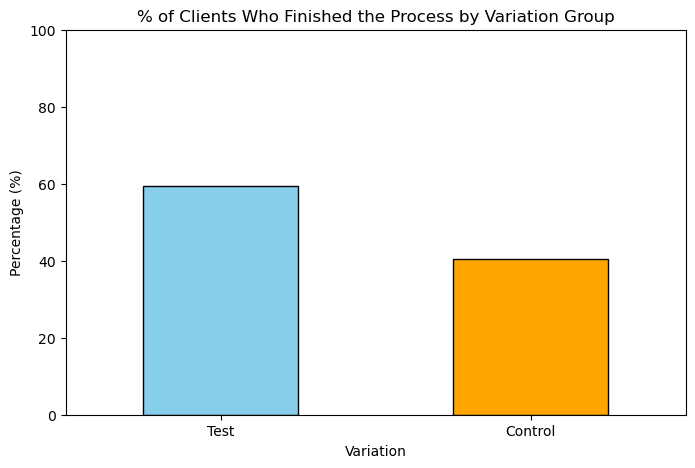

In [38]:
#Per group
print(f"Number of clients who finished the process by Variation group:")
print(variation_counts)

print(f"\nPercentage of clients who finished the process by Variation group:")
print(variation_percentage)

# Visualization of % completion by Variation group
plt.figure(figsize=(8, 5))
variation_percentage.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')
plt.title('% of Clients Who Finished the Process by Variation Group')
plt.xlabel('Variation')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.show()

# Mistake assesment

In [39]:
#Comprobar cuantas veces se pasó de un paso posterior a uno anterior (Creación de columna con FALLOS)
# Definir el orden de los pasos
process_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Crear una columna con el orden de los pasos en un valor numérico
df_final['process_order'] = df_final['process_step'].apply(lambda x: process_order.index(x))

# Ordenar el DataFrame por visit_id y date_time
df_final = df_final.sort_values(by=['visit_id', 'date_time'])

# Crear una columna que tenga el paso anterior
df_final['prev_process_order'] = df_final.groupby('visit_id')['process_order'].shift(1)

# Filtrar las transiciones donde el paso actual es posterior al anterior (Cuando el proceso anterior es mayor al actual significa que ha habido un fallo)
df_transitions = df_final[df_final['process_order'] < df_final['prev_process_order']]

# Contar las transiciones por cada visit_id
transitions_count = df_transitions.groupby('visit_id').size()

# Crear una columna en la que TRUE indique que ha habido fallo (retroceso)
df_final["Fallo"] = df_final['process_order'] < df_final['prev_process_order']
df_final["Fallo_y_mismo_paso"] = df_final["process_order"] <= df_final["prev_process_order"]

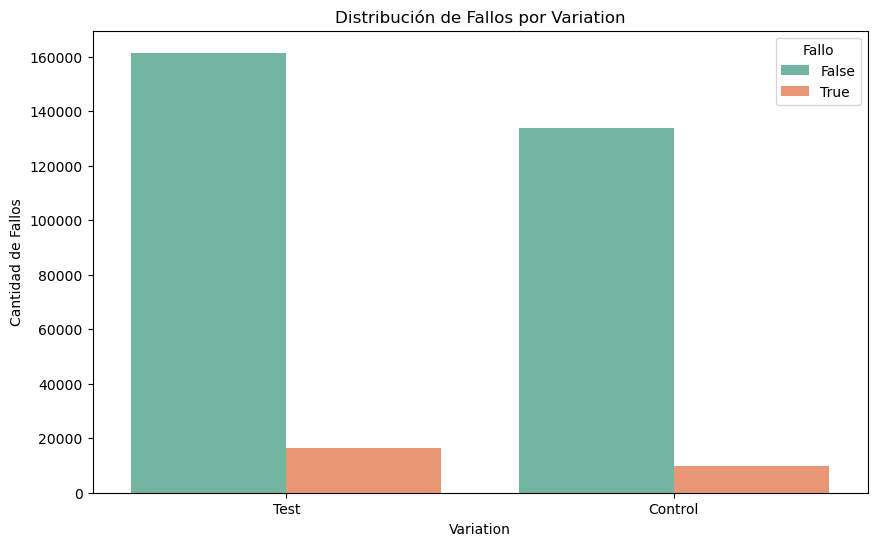

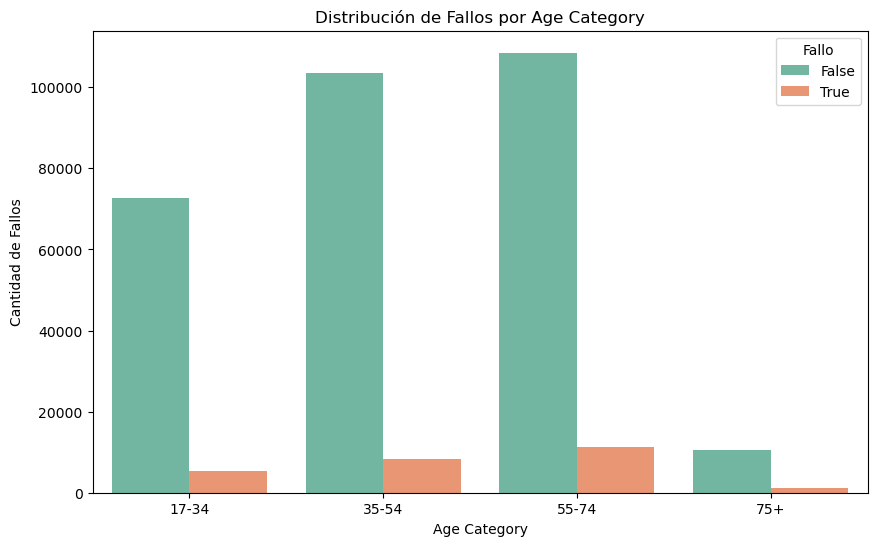

In [40]:
#Comparación de fallos por grupo
# Graficar la distribución de Fallos según Variation y Age Category
plt.figure(figsize=(10, 6))
sns.countplot(data=df_final, x='Variation', hue='Fallo', palette='Set2')
plt.title('Distribución de Fallos por Variation')
plt.xlabel('Variation')
plt.ylabel('Cantidad de Fallos')
plt.legend(title='Fallo', labels=['False', 'True'])
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df_final, x='age_category', hue='Fallo', palette='Set2')
plt.title('Distribución de Fallos por Age Category')
plt.xlabel('Age Category')
plt.ylabel('Cantidad de Fallos')
plt.legend(title='Fallo', labels=['False', 'True'])
plt.show()

In [41]:
# Contabilizar los retrocesos *desde* cada paso (es decir, cuántas veces se retrocedió desde un paso hacia uno anterior)
retrocesos_desde_paso = df_final[df_final['Fallo']].groupby('prev_process_order').size()

# Mostrar los resultados
print("\nContabilización de retrocesos desde cada paso:")
print(retrocesos_desde_paso)


Contabilización de retrocesos desde cada paso:
prev_process_order
1.0    8905
2.0    6952
3.0    9001
4.0    1231
dtype: int64


In [42]:
# Prueba de proporciones
# Contamos los fallos (True) y el total de observaciones en cada grupo
control_fallos = df_final[df_final['Variation'] == 'Control']['Fallo'].sum()
test_fallos = df_final[df_final['Variation'] == 'Test']['Fallo'].sum()

control_total = len(df_final[df_final['Variation'] == 'Control'])
test_total = len(df_final[df_final['Variation'] == 'Test'])

# Realizamos la prueba de proporciones
counts = [control_fallos, test_fallos]
nobs = [control_total, test_total]

z_stat, p_value = proportions_ztest(counts, nobs)

print(f"Estadístico Z: {z_stat}")
print(f"Valor p: {p_value}")

# Si el valor p es menor a 0.05, las diferencias son significativas
if p_value < 0.05:
    print("Las diferencias en las proporciones de fallos entre Control y Test son estadísticamente significativas.")
else:
    print("Las diferencias en las proporciones de fallos entre Control y Test no son significativas.")



Estadístico Z: -24.874538105687666
Valor p: 1.4035488084300064e-136
Las diferencias en las proporciones de fallos entre Control y Test son estadísticamente significativas.


In [43]:
#Calcular la proporción de fallos
print(f"La proporción de fallos en el control es de {control_fallos/control_total}")
print(f"La proporción de fallos en el test es de {test_fallos/test_total}")

La proporción de fallos en el control es de 0.06785072005130278
La proporción de fallos en el test es de 0.09196106765928017


In [44]:
#Prueba Chi cuadrado
# Creamos una tabla de contingencia entre 'Variation' y 'Fallo'
contingency_table = pd.crosstab(df_final['Variation'], df_final['Fallo'])

# Realizamos el test de chi-cuadrado
chi2_stat, p_value_chi2, dof, expected = chi2_contingency(contingency_table)

print(f"Estadístico Chi-cuadrado: {chi2_stat}")
print(f"Valor p: {p_value_chi2}")

# Si el valor p es menor a 0.05, podemos rechazar la hipótesis nula y decir que las variables son dependientes
if p_value_chi2 < 0.05:
    print("Las variables 'Variation' y 'Fallo' son dependientes (hay una asociación significativa).")
else:
    print("Las variables 'Variation' y 'Fallo' son independientes (no hay asociación significativa).")


Estadístico Chi-cuadrado: 618.4195070057738
Valor p: 1.6500964341904918e-136
Las variables 'Variation' y 'Fallo' son dependientes (hay una asociación significativa).


In [45]:
# Realizar un ANOVA entre las categorías de edad
# Filtrar los datos para los valores de Fallo (True)
df_true = df_final[df_final['Fallo'] == True]

# Realizar un ANOVA entre las categorías de edad para los valores de variation
f_stat, p_value_age = stats.f_oneway(
    df_true[df_true['age_category'] == 'Category1']['Variation'],
    df_true[df_true['age_category'] == 'Category2']['Variation'],
    df_true[df_true['age_category'] == 'Category3']['Variation']
    # Añadir más categorías si es necesario
)

print(f"Estadístico F: {f_stat}")
print(f"Valor p: {p_value_age}")

# Comprobar si el valor p es menor a 0.05
if p_value_age < 0.05:
    print("Las diferencias entre las medias de age_category son significativas.")
else:
    print("Las diferencias entre las medias de age_category no son significativas.")



Estadístico F: nan
Valor p: nan
Las diferencias entre las medias de age_category no son significativas.


c:\Users\javie\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


# Average duration of each step process

In [46]:
df_final.head()

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,...,date_time,gender,bal_log,age_category,tenure_category,balance_category,process_order,prev_process_order,Fallo,Fallo_y_mismo_paso
142182,3561384,Test,4.0,56.0,59.5,U,2.0,63130.44,6.0,9.0,...,2017-04-26 13:22:17,2.0,11.052974,55-74,0-6,Medium,4,NaN,False,False
142181,3561384,Test,4.0,56.0,59.5,U,2.0,63130.44,6.0,9.0,...,2017-04-26 13:23:09,2.0,11.052974,55-74,0-6,Medium,4,4.0,False,True
315155,7338123,Test,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,...,2017-04-09 16:20:56,1.0,10.182547,17-34,7-11,Low,0,NaN,False,False
315154,7338123,Test,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,...,2017-04-09 16:21:12,1.0,10.182547,17-34,7-11,Low,1,0.0,False,False
315153,7338123,Test,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,...,2017-04-09 16:21:21,1.0,10.182547,17-34,7-11,Low,2,1.0,False,False


In [47]:
# Sort by client_id, visit_id, and date_time to ensure proper time order
df_final = df_final.sort_values(by=['client_id', 'visit_id', 'date_time'])

# Calculate time differences (time spent on each step)
df_final['time_spent'] = df_final.groupby(['client_id', 'visit_id'])['date_time'].diff().dt.total_seconds()

# Fill NaN for the first step of each session with 0 (optional for completeness)
df_final['time_spent'] = df_final['time_spent'].fillna(0)

# Shift the values of time_spent one step back
df_final['time_spent'] = df_final.groupby(['client_id', 'visit_id'])['time_spent'].shift(-1)

# Calculate average time spent per step
average_time_per_step = df_final.groupby('process_step')['time_spent'].mean().reset_index()

# Rename columns for better understanding
average_time_per_step.columns = ['Process Step', 'Average Time (seconds)']

# Sort by process order (optional, if process steps should appear in logical order)
step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
average_time_per_step['Process Step'] = pd.Categorical(average_time_per_step['Process Step'], categories=step_order, ordered=True)
average_time_per_step = average_time_per_step.sort_values(by='Process Step')

# Display the dataframe with the new column and the summary
print(df_final.head())  # To verify the new column
print("\nAverage Time Per Step:")
print(average_time_per_step)

       client_id Variation  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  \
94261        555      Test             3.0              46.0      29.5     U   
94260        555      Test             3.0              46.0      29.5     U   
94259        555      Test             3.0              46.0      29.5     U   
94258        555      Test             3.0              46.0      29.5     U   
94257        555      Test             3.0              46.0      29.5     U   

       num_accts       bal  calls_6_mnth  logons_6_mnth  ... gender  \
94261        2.0  25454.66           2.0            6.0  ...    2.0   
94260        2.0  25454.66           2.0            6.0  ...    2.0   
94259        2.0  25454.66           2.0            6.0  ...    2.0   
94258        2.0  25454.66           2.0            6.0  ...    2.0   
94257        2.0  25454.66           2.0            6.0  ...    2.0   

         bal_log age_category tenure_category  balance_category  \
94261  10.144693        1

In [48]:
# Transform average times from seconds to minutes
average_time_minutes = average_time_per_step.copy()
average_time_minutes['Average Time (minutes)'] = average_time_per_step['Average Time (seconds)'] / 60


In [49]:
# Print the transformed table
print("\nAverage Time Per Step (in minutes):")
print(average_time_minutes)


Average Time Per Step (in minutes):
  Process Step  Average Time (seconds)  Average Time (minutes)
1        start               61.605462                1.026758
2       step_1               56.149765                0.935829
3       step_2               89.937565                1.498959
4       step_3              131.907937                2.198466
0      confirm              208.422731                3.473712


Confirm step having average data implies that some users have taken more steps after a confirm in the same session. Let's count these entries

In [50]:
# Count the entries where 'confirm' step has a non-null time_spent
confirm_step_with_time = df_final[df_final['process_step'] == 'confirm']['time_spent'].notnull().sum()

# Print the count
print(f"Number of 'confirm' steps with associated time_spent: {confirm_step_with_time}")

Number of 'confirm' steps with associated time_spent: 6335


In [51]:
# Filter out 'confirm' step since it has no meaningful time difference
filtered_data = df_final[df_final['process_step'] != 'confirm']

# Calculate the average time per step for Test and Control groups
average_time_by_variation = (
    filtered_data.groupby(['process_step', 'Variation'])['time_spent']
    .mean()
    .reset_index()
    .rename(columns={'time_spent': 'Average Time (seconds)'})
)

# Convert to minutes
average_time_by_variation['Average Time (minutes)'] = (
    average_time_by_variation['Average Time (seconds)'] / 60
)

# Print the average times for Test and Control groups
print("\nAverage Time Per Step by Variation:")
print(average_time_by_variation)

# Perform hypothesis testing for each process step
hypothesis_results = []

for step in filtered_data['process_step'].unique():
    test_group = filtered_data[
        (filtered_data['process_step'] == step) & (filtered_data['Variation'] == 'Test')
    ]['time_spent']
    control_group = filtered_data[
        (filtered_data['process_step'] == step) & (filtered_data['Variation'] == 'Control')
    ]['time_spent']

    # Perform t-test
    t_stat, p_value = mannwhitneyu(test_group, control_group, nan_policy='omit')

    # Store results
    hypothesis_results.append({
        'Process Step': step,
        'Test Avg Time (minutes)': test_group.mean() / 60,
        'Control Avg Time (minutes)': control_group.mean() / 60,
        't-statistic': t_stat,
        'p-value': p_value
    })

# Convert results to DataFrame for display
hypothesis_df = pd.DataFrame(hypothesis_results)

# Print hypothesis test results
print("\nHypothesis Testing Results:")
print(hypothesis_df)


Average Time Per Step by Variation:
  process_step Variation  Average Time (seconds)  Average Time (minutes)
0        start   Control               62.906464                1.048441
1        start      Test               60.555121                1.009252
2       step_1   Control               50.227453                0.837124
3       step_1      Test               60.499453                1.008324
4       step_2   Control               91.579342                1.526322
5       step_2      Test               88.585598                1.476427
6       step_3   Control              135.375146                2.256252
7       step_3      Test              128.953546                2.149226

Hypothesis Testing Results:
  Process Step  Test Avg Time (minutes)  Control Avg Time (minutes)  \
0        start                 1.009252                    1.048441   
1       step_1                 1.008324                    0.837124   
2       step_2                 1.476427                    1.526

Conclusions:
1. Start --> No significant difference between the test and control groups at 5%

2. Step_1 --> A significant difference between the test and control groups at 5%. Test group users spend more time on this step.

3. Step 2 --> A significant difference between the test and control groups at 5%. Control group users spend slightly more time on this step.

4. Step 3 --> A significant difference between the test and control groups at 5%. Control group users spend more time on this step

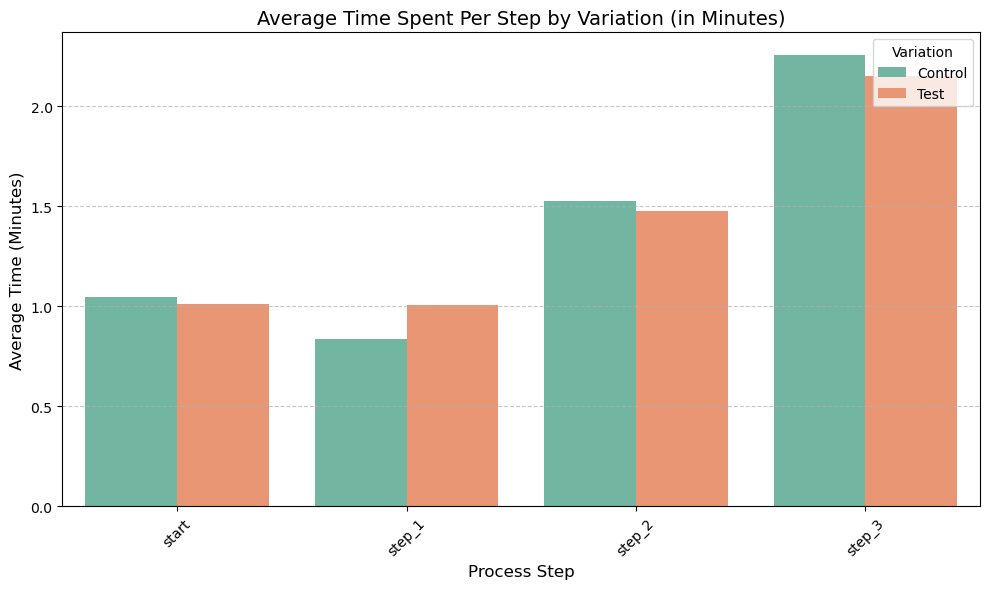

In [52]:
# Create the grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=average_time_by_variation,
    x='process_step',
    y='Average Time (minutes)',
    hue='Variation',
    palette='Set2'
)

# Customize the plot
plt.title('Average Time Spent Per Step by Variation (in Minutes)', fontsize=14)
plt.xlabel('Process Step', fontsize=12)
plt.ylabel('Average Time (Minutes)', fontsize=12)
plt.legend(title='Variation', loc='upper right')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Preguntas adicionales

¿Los clientes que llaman más al servicio de atención al cliente tienen más probabilidades de completar el proceso o de fallar en algún paso?

C:\Users\javie\AppData\Local\Temp\ipykernel_16628\3575486985.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_top_10.index, y=avg_price_top_10.values, palette="coolwarm")


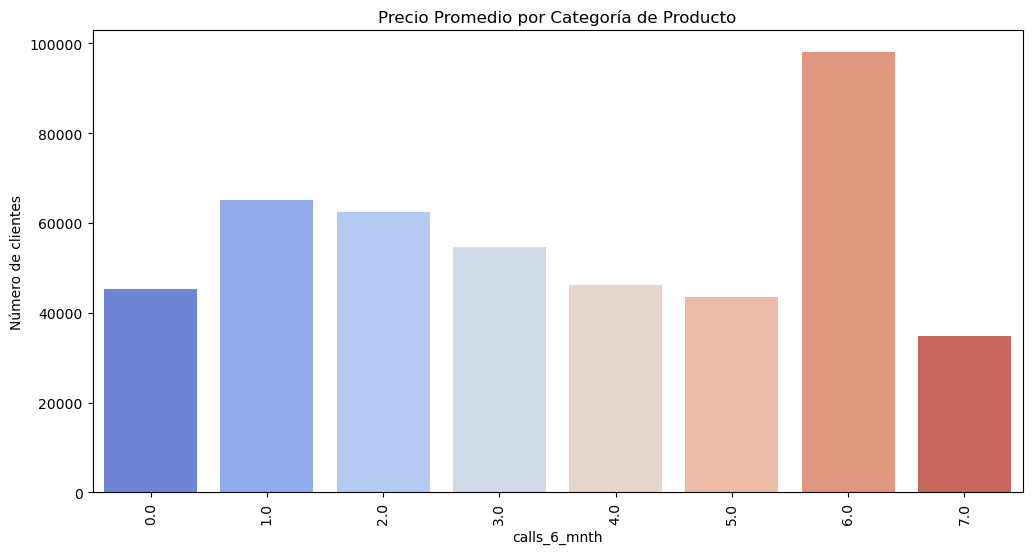

In [53]:
df_complet_proces = pd.merge(df_final_demo, df_web_data_merged, on='client_id', how='inner')
grupo_complet_proces = df_complet_proces[df_complet_proces['process_step'] == 'confirm']['client_id']
top_10_categories = df_complet_proces['calls_6_mnth'].value_counts().head(10).index
avg_price_top_10 = df_complet_proces[df_complet_proces['calls_6_mnth'].isin(top_10_categories)].groupby('calls_6_mnth')['client_id'].count().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_top_10.index, y=avg_price_top_10.values, palette="coolwarm")
plt.title('Precio Promedio por Categoría de Producto')
plt.xlabel('calls_6_mnth')
plt.ylabel('Número de clientes')
plt.xticks(rotation=90)
plt.show()

In [54]:
# Agrupar por 'client_id' y verificar si existe el valor 'Confirm' en 'process_step'
result = df_complet_proces.groupby('client_id')['process_step'].apply(lambda x: 'confirm' in x.values).reset_index()

# Renombrar la columna para mayor claridad
result.columns = ['client_id', 'has_confirm']

print(result)

       client_id  has_confirm
0            169         True
1            555         True
2            647         True
3            722         True
4            934        False
...          ...          ...
70604    9999400         True
70605    9999626        False
70606    9999729         True
70607    9999832        False
70608    9999839         True

[70609 rows x 2 columns]


In [55]:
df_confirm = pd.merge(df_final_demo, result, on='client_id', how='inner')
result = df_confirm.groupby('calls_6_mnth')['has_confirm'].value_counts()
result.head()

calls_6_mnth  has_confirm
0.0           True           4969
              False          2763
1.0           True           7340
              False          3676
2.0           True           6850
Name: has_confirm, dtype: int64

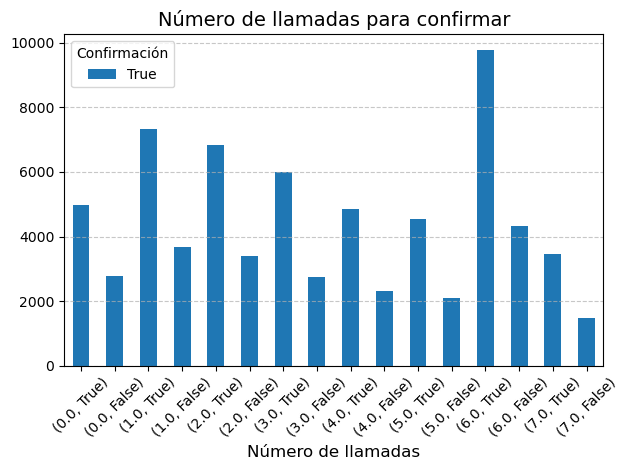

In [56]:
result.plot.bar(stacked = True)
# Customize the plot
plt.title('Número de llamadas para confirmar', fontsize=14)
plt.xlabel('Número de llamadas', fontsize=12)
plt.legend(title='Confirmación', labels=['True', 'False'])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [57]:
# Groupby 'calls_6_mnth' y agrega un conteo de 'has_confirm' según True or False
summary = df_confirm.groupby('calls_6_mnth')['has_confirm'].value_counts().unstack(fill_value=0)

# Renombra las columnas
summary.columns = ['not_confirmed', 'confirmed']

# Resetea el  índice
summary.reset_index(inplace=True)

print(summary)

   calls_6_mnth  not_confirmed  confirmed
0           0.0           2763       4969
1           1.0           3676       7340
2           2.0           3402       6850
3           3.0           2757       5995
4           4.0           2313       4862
5           5.0           2086       4541
6           6.0           4337       9775
7           7.0           1473       3456


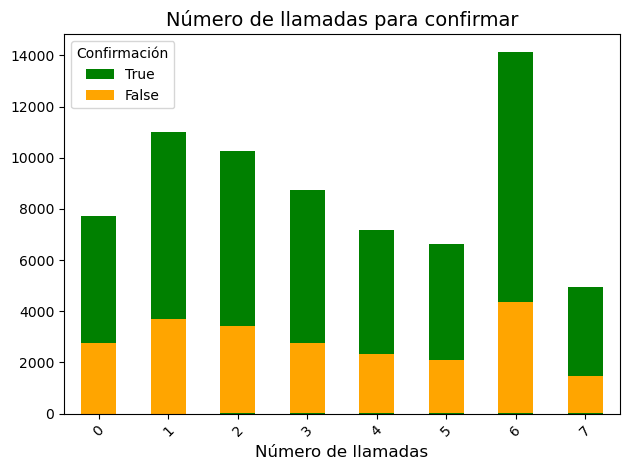

In [58]:
summary.plot(kind='bar', stacked = True, color=['green', 'orange'])
plt.title('Número de llamadas para confirmar', fontsize=14)
plt.xlabel('Número de llamadas', fontsize=12)
plt.legend(title='Confirmación', labels=['True', 'False'])
plt.xticks(rotation=45)


# Show the plot
plt.tight_layout()
plt.show()